In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('./data_tf/data_concat.csv')

In [3]:
df.columns

Index(['DatadaColeta', 'ValordeVenda', 'VR', 'usd_Price', 'usd_Perc16',
       'usd_Perc17', 'usd_Perc14', 'usd_Perc8', 'usd_Perc4', 'usd_Perc2',
       'brent_Price', 'brent_Perc16', 'brent_Perc17', 'brent_Perc14',
       'brent_Perc8', 'brent_Perc4', 'brent_Perc2', 'crude_Price',
       'crude_Perc16', 'crude_Perc17', 'crude_Perc14', 'crude_Perc8',
       'crude_Perc4', 'crude_Perc2', 'bov_Price', 'bov_Perc16', 'bov_Perc17',
       'bov_Perc14', 'bov_Perc8', 'bov_Perc4', 'bov_Perc2', 'eta_Price',
       'eta_Perc16', 'eta_Perc17', 'eta_Perc14', 'eta_Perc8', 'eta_Perc4',
       'eta_Perc2', 'dist_Price', 'dist_Perc16', 'dist_Perc17', 'dist_Perc14',
       'dist_Perc8', 'dist_Perc4', 'dist_Perc2', 'BRL_crude_Price',
       'BRL_brent_Price'],
      dtype='object')

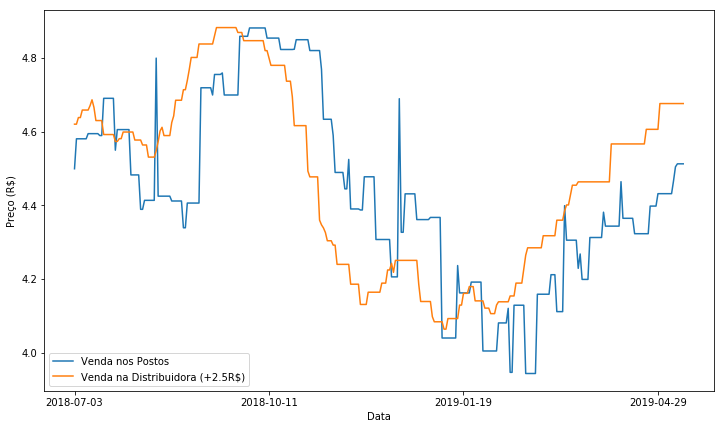

In [4]:
plt.figure(figsize=[12,7])
g = sns.lineplot(data=df,x="DatadaColeta",y="ValordeVenda")
g = sns.lineplot(x=df["DatadaColeta"],y=df["dist_Price"]+2.5)
g.set(xticks=[0,100,200,300],xlabel="Data",ylabel="Preço (R$)")
plt.legend(loc='lower left',labels=["Venda nos Postos","Venda na Distribuidora (+2.5R$)"])
plt.show()

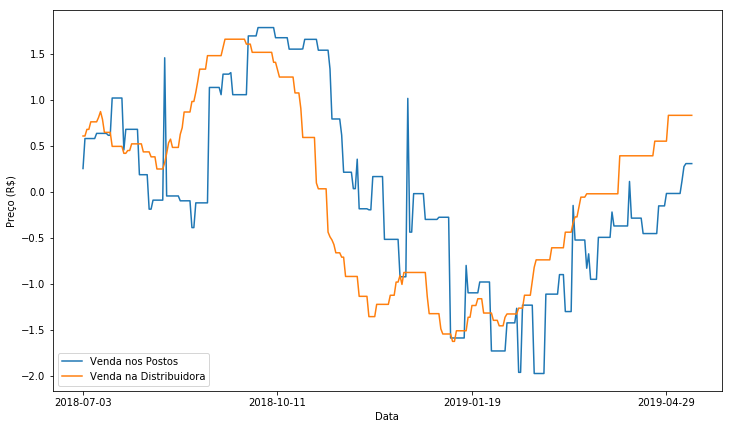

In [5]:
plt.figure(figsize=[12,7])
g = sns.lineplot(x=df["DatadaColeta"],y=(df["ValordeVenda"]-df["ValordeVenda"].mean())/df["ValordeVenda"].std())
g = sns.lineplot(x=df["DatadaColeta"],y=(df["dist_Price"]-df["dist_Price"].mean())/df["dist_Price"].std())
g.set(xticks=[0,100,200,300],xlabel="Data",ylabel="Preço (R$)")
plt.legend(loc='lower left',labels=["Venda nos Postos","Venda na Distribuidora"])
plt.show()

In [19]:
from scipy.signal import correlate

In [20]:
def phase_shift(A,B):
    xcorr = correlate(A,B)
    nsamples = A.shape[0]
    dt = np.arange(1-nsamples, nsamples)
    return dt[xcorr.argmax()]

In [21]:
time_shift = phase_shift((df["ValordeVenda"]-df["ValordeVenda"].mean())/df["ValordeVenda"].std(),\
                  (df["dist_Price"]-df["dist_Price"].mean())/df["dist_Price"].std())

In [22]:
print(f"Diferença de fase: {time_shift} dias")

Diferença de fase: 16 dias


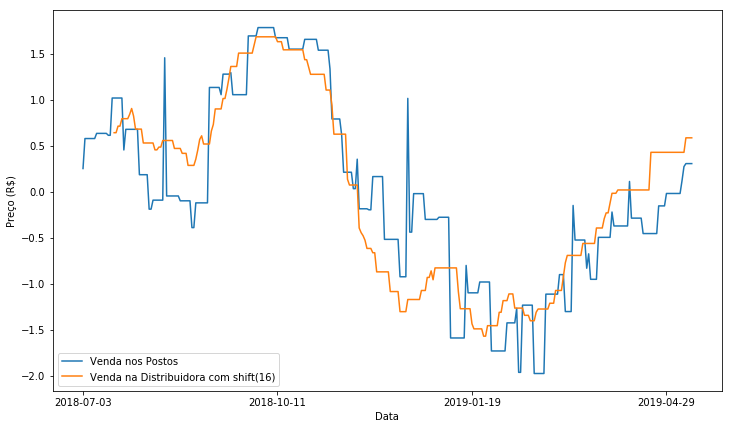

In [24]:
#shift = 16
plt.figure(figsize=[12,7])
g = sns.lineplot(x=df["DatadaColeta"],y=(df["ValordeVenda"]-df["ValordeVenda"].mean())/df["ValordeVenda"].std())
g = sns.lineplot(x=df["DatadaColeta"],y=(df["dist_Price"].shift(time_shift)-df["dist_Price"].shift(16).mean())/df["dist_Price"].shift(16).std())
g.set(xticks=[0,100,200,300],xlabel="Data",ylabel="Preço (R$)")
plt.legend(loc='lower left',labels=["Venda nos Postos",f"Venda na Distribuidora com shift({time_shift})"])
plt.show()

In [10]:
import plotly.graph_objects as go

In [11]:
#Gráfico interativo para verificação de timeshift

fig = go.Figure()
fig.add_trace(go.Scatter(x=df["DatadaColeta"], y=(df["ValordeVenda"]-df["ValordeVenda"].mean())/df["ValordeVenda"].std(),\
                    mode='lines',
                    name='lines'))
fig.add_trace(go.Scatter(x=df["DatadaColeta"], y=(df["dist_Price"]-df["dist_Price"].mean())/df["dist_Price"].std(),
                    mode='lines',
                    name='lines'))
#fig = px.line(df2,x="DatadaColeta",y="Valor_std")
#fig += px.line(df2,x="DatadaColeta",y="dist_std")
fig.show()


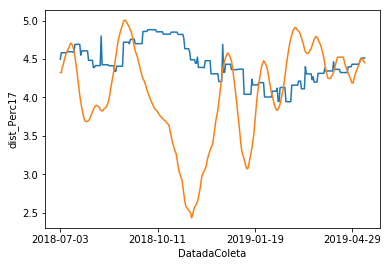

In [26]:
g = sns.lineplot(data=df,x="DatadaColeta",y="ValordeVenda")
g = sns.lineplot(x=df["DatadaColeta"],y=df["dist_Perc17"].rolling(window=10,min_periods=1).mean()/10+4)
g.set(xticks=[0,100,200,300])
plt.show()

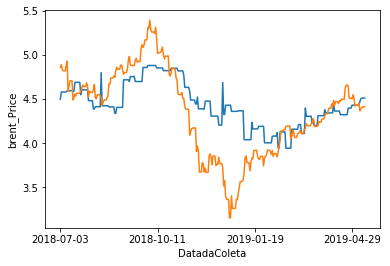

In [13]:
g = sns.lineplot(data=df,x="DatadaColeta",y="ValordeVenda")
g = sns.lineplot(x=df["DatadaColeta"],y=df["brent_Price"].rolling(window=1,min_periods=1).mean()/16)
g.set(xticks=[0,100,200,300])
plt.show()

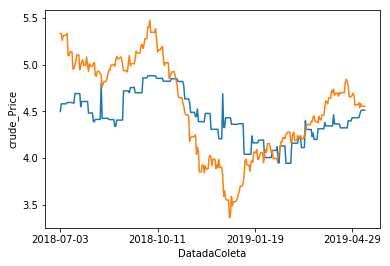

In [14]:
g = sns.lineplot(data=df,x="DatadaColeta",y="ValordeVenda")
g = sns.lineplot(x=df["DatadaColeta"],y=df["crude_Price"]/16+0.7)
g.set(xticks=[0,100,200,300])
plt.show()

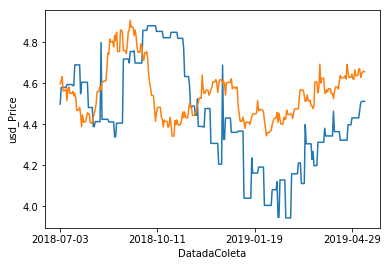

In [15]:
g = sns.lineplot(data=df,x="DatadaColeta",y="ValordeVenda")
g = sns.lineplot(x=df["DatadaColeta"],y=df["usd_Price"]+0.7)
g.set(xticks=[0,100,200,300])
plt.show()

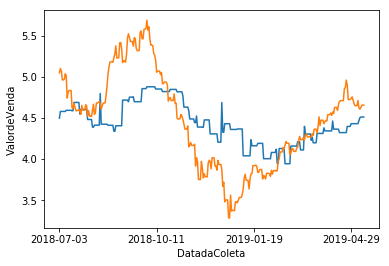

In [16]:
g = sns.lineplot(data=df,x="DatadaColeta",y="ValordeVenda")
g = sns.lineplot(x=df["DatadaColeta"],y=df["brent_Price"]*df["usd_Price"]/60)
g.set(xticks=[0,100,200,300])
plt.show()

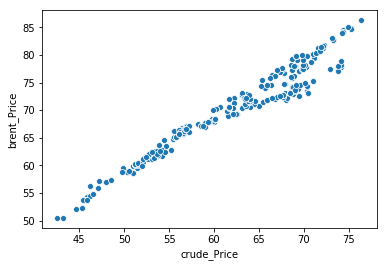

In [17]:
sns.scatterplot(x=df["crude_Price"],y=df["brent_Price"])

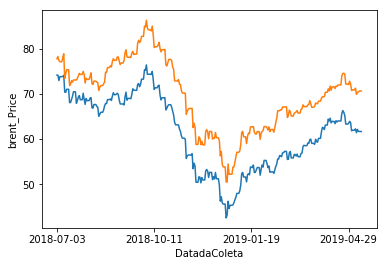

In [18]:
g = sns.lineplot(data=df,x="DatadaColeta",y="crude_Price")
g = sns.lineplot(x=df["DatadaColeta"],y=df["brent_Price"])
g.set(xticks=[0,100,200,300])
plt.show()

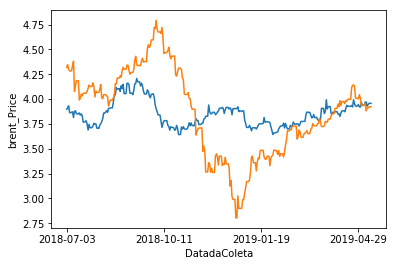

In [19]:
g = sns.lineplot(data=df,x="DatadaColeta",y="usd_Price")
g = sns.lineplot(x=df["DatadaColeta"],y=df["brent_Price"]/18)
g.set(xticks=[0,100,200,300])
plt.show()

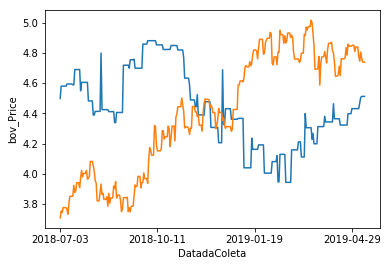

In [20]:
g = sns.lineplot(data=df,x="DatadaColeta",y="ValordeVenda")
g = sns.lineplot(x=df["DatadaColeta"],y=df["bov_Price"]/20)
g.set(xticks=[0,100,200,300])
plt.show()

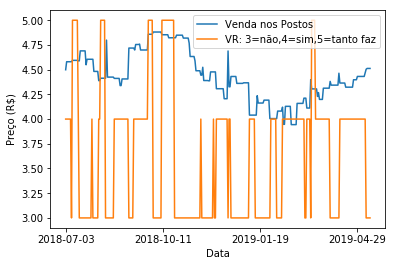

In [21]:
g = sns.lineplot(data=df,x="DatadaColeta",y="ValordeVenda")
g = sns.lineplot(x=df["DatadaColeta"],y=df["VR"]+3)
g.set(xticks=[0,100,200,300],xlabel="Data",ylabel="Preço (R$)")
plt.legend(loc='upper right',labels=["Venda nos Postos","VR: 3=não,4=sim,5=tanto faz"])
plt.show()